# 機械学習の概要
- 学習の方法とその一連の流れをモデルと呼ぶ。
- 機械学習の分類プログラムを分類機と呼ぶ。

### ロジスティック回帰モデル
- 線形分離可能なデータの境界線を学習によって見つけてデータ分類を行う。
- 境界線が直線で、二項分類に用いられる。
- 一般化した境界線になりにくい（汎用性は低い）。

In [2]:
from sklearn.datasets import make_classification as mcf
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib
import matplotlib .pyplot as plt
%matplotlib inline

x, y = mcf(n_samples=100, n_features=2, n_redundant=0,random_state=0)
train_X, test_X, train_y, test_y = train_test_split(x, y)

model = LR(solver="liblinear")
model.fit(train_X,train_y)
pred_y = model.predict(test_X)
print(pred_y)

[1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1]


In [3]:
model.score(test_X, test_y)

0.96

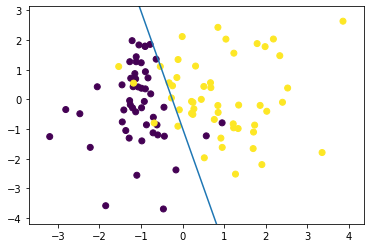

In [5]:
plt.scatter(x[:, 0],x[:, 1],c=y)
Xi = np.linspace(-10, 10)
Y = -model.coef_[0][0]/model.coef_[0][1] * Xi - model.intercept_/model.coef_[0][1]
plt.plot(Xi, Y)

plt.xlim(min(x[:, 0]) - 0.5, max(x[:, 0]) + 0.5)
plt.ylim(min(x[:, 1]) - 0.5, max(x[:, 1]) + 0.5)
plt.show()

### 線形SVM
- ベクトルで各点の距離間を測って、それを元に分ける手法。
- サポートヴェクターマシーンの略。

0.9733333333333334


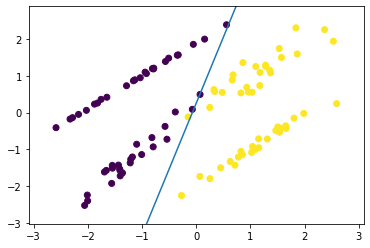

In [10]:
X, y =mcf(n_samples=100, n_features=2,
         n_redundant=0, random_state=42)

train_X, test_X, train_y, test_y = train_test_split(X, y,random_state=42)
model = LinearSVC()

model.fit(train_X, train_y)
print(model.score(train_X, train_y))

plt.scatter(X[:, 0],X[:, 1],c=y)
Xi = np.linspace(-10, 10)
Y = -model.coef_[0][0]/model.coef_[0][1] * Xi - model.intercept_/model.coef_[0][1]
plt.plot(Xi, Y)
plt.xlim(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5)
plt.ylim(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5)
plt.show()

### 非線形SVM法
- カーネル関数によって写像したところ、線形分離できる形に直せる場合がある。
- 線形SVMが線形分離可能でないと使えないもの、であったのに対し、そのまま使用できるため補う形で使われる。

Using matplotlib backend: Qt5Agg
0.99


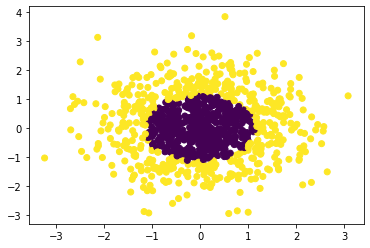

In [151]:
import matplotlib
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles as mgq
import matplotlib.pyplot as plt
%matplotlib

data, label = mgq(n_samples=1000, n_classes=2,\
                  n_features=2,random_state=42)
model = SVC(gamma="scale")
model.fit(data,label)
print(model.score(data,label))
plt.scatter(data[:, 0],data[:, 1],c=label)

### 決定木
- 一つ一つの説明的変数の影響を調べて、分けていくもの。
- データのクラス分類が得意だが、線形分離可能なものは苦手。

In [164]:
#きのこのデータを入手する
import requests
import zipfile
from io import StringIO
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [165]:
mush_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s = requests.get(mush_data_url).content
mush_data = pd.read_csv(io.StringIO(s.decode("utf-8")),header=None)
mush_data.columns = ["classes", "cap_shape", "cap_surface",
                    "cap_color", "odor", "bruises",
                    "gill_attachment", "gill_spacing",
                    "gill_size", "gill_color", "stalk_shape",
                    "stalk_root", "stalk_surface_above_ring",
                    "stalk_surface_below_ring",
                    "stalk_color_above_ring",
                    "stalk_color_below_ring",
                    "veil_type", "veil_color", "ring_number",
                    "ring_type", "spore_print_color",
                    "population", "habitat"]
mush_data_dummy = pd.get_dummies(mush_data[["gill_color", "gill_attachment", "odor", "cap_color"]])
mush_data_dummy["flg"] = mush_data["classes"].map(lambda x : 1 if x == "p" else 0)

In [170]:
X = mush_data_dummy.drop("flg", axis=1)
Y = mush_data_dummy["flg"]

train_X, test_X, train_y, test_y = train_test_split(X, Y, random_state=42)

model = DecisionTreeClassifier()
model.fit(train_X, train_y)
print(model.score(test_X, test_y))

0.9094042343673068


### ランダムフォレスト
- 決定木の簡易版を複数層作成し、分類結果を多数決で選定する。
- 複数の簡易分類機をまとめて一つの分類機として利用することを、アンサンブル学習という。
- 外れ値に左右されづらい利点と説明変数に対してデータの数が少ないと効果を発揮できないことが挙げられる。

In [173]:
import requests
import zipfile
from io import StringIO
import io
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [174]:
mush_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s = requests.get(mush_data_url).content
mush_data = pd.read_csv(io.StringIO(s.decode("utf-8")),header=None)
mush_data.columns = ["classes", "cap_shape", "cap_surface",
                    "cap_color", "odor", "bruises",
                    "gill_attachment", "gill_spacing",
                    "gill_size", "gill_color", "stalk_shape",
                    "stalk_root", "stalk_surface_above_ring",
                    "stalk_surface_below_ring",
                    "stalk_color_above_ring",
                    "stalk_color_below_ring",
                    "veil_type", "veil_color", "ring_number",
                    "ring_type", "spore_print_color",
                    "population", "habitat"]
mush_data_dummy = pd.get_dummies(mush_data[["gill_color", "gill_attachment", "odor", "cap_color"]])
mush_data_dummy["flg"] = mush_data["classes"].map(lambda x : 1 if x == "p" else 0)
X = mush_data_dummy.drop("flg", axis=1)
Y = mush_data_dummy["flg"]

train_X, test_X, train_y, test_y = train_test_split(X, Y, random_state=42)

In [176]:
model1 = RF(n_estimators=100)
model2 = DTC()

model1.fit(train_X, train_y)
model2.fit(train_X, train_y)

print(model1.score(test_X, test_y))
print(model2.score(test_X, test_y))j

0.9094042343673068
0.9094042343673068


### k-NN法
- k近傍法とも呼ばれる、機械学習の手法ではあるが、学習にかかる計算量がゼロ。
- ①教師データを予測に用いるデータとの類似度で並べる
- ②分類機に設定したk個のデータを類似度の高い順に参照する。
- ③参照された教師データが属するクラスの中で最も多かったものを予測結果として出す。
- 予測時に、直接教師データを参照する簡易なアルゴリズムな割に高い精度が出しやすい。
- しかしながらデータ量が多いと、直接的な計算量が増えるため低速になりがち。

In [3]:
from sklearn.neighbors import KNeighborsClassifier as KN
import requests
import zipfile
from io import StringIO
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

mush_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s = requests.get(mush_data_url).content
mush_data = pd.read_csv(io.StringIO(s.decode("utf-8")),header=None)
mush_data.columns = ["classes", "cap_shape", "cap_surface",
                    "cap_color", "odor", "bruises",
                    "gill_attachment", "gill_spacing",
                    "gill_size", "gill_color", "stalk_shape",
                    "stalk_root", "stalk_surface_above_ring",
                    "stalk_surface_below_ring",
                    "stalk_color_above_ring",
                    "stalk_color_below_ring",
                    "veil_type", "veil_color", "ring_number",
                    "ring_type", "spore_print_color",
                    "population", "habitat"]
mush_data_dummy = pd.get_dummies(mush_data[["gill_color", "gill_attachment", "odor", "cap_color"]])
mush_data_dummy["flg"] = mush_data["classes"].map(lambda x : 1 if x == "p" else 0)
X = mush_data_dummy.drop("flg", axis=1)
Y = mush_data_dummy["flg"]

train_X, test_X, train_y, test_y = train_test_split(X, Y, random_state=42)

model = KN()

model.fit(train_X, train_y)
print(model.score(test_X, test_y))

0.9039881831610044
